# EDA parte 2 - Geração de Insights

### Principais problemas de negócio
- Previsão de vendas de empresa varejista
- Previsão de custos e margem líquida
- Verficiar projeção de crescimento
- Categorias e produtos em alta, bem como em baixa
- Projeção de lucro e custos por estado 
- Horas com maiores volumes de vendas
- Dia da semana com maiores volumes de vendas

### Novos Insights 

- Elaborar DF com quantidades vendidas por mês para cada produto, para então verificar se a tendência é crescer ou diminuir 
- Utilizar o gráfico de margem liquida para elaborar uma preisão de crescimento ou n, utilizando regressão para o primeiro mês
- Verificar a quantidade prevista para venda de cada produto com regressão linear, com isso, verificar os custos e projeção de lucros por produto 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import re

In [4]:
# Importação do dataset
data = pd.read_csv('../data/dados_vendas_att2.csv', sep=',')

In [5]:
data.rename(columns={'Custo_Produto': 'Custo_Pedido'}, inplace= True)

In [6]:
data.sample(10)

,Produto,Categoria,Quantidade_Comprada,Preco_Unitario,Custo,Faturamento,Lucro_Bruto,Estado,Cidade,Horario_Venda,Data_Venda,Dia_Semana
14708,"Monitor 20""",Alimentação,1,109.99,71.4935,109.99,38.4965,CA,San Francisco,14,2019-02-01,Sexta-Feira
24307,Pilhas AA (4 Unidades),Esportes,1,3.84,1.9200,3.84,1.9200,TX,Dallas,10,2019-03-30,Sábado
13692,Fone de Ouvido Sem Fio,Roupas,1,11.99,5.9950,11.99,5.9950,TX,Dallas,23,2019-02-24,Domingo
135610,iPhone,Alimentação,1,700.00,231.0000,700.00,469.0000,MA,Boston,23,2019-10-25,Sexta-Feira
87434,Pilhas AA (4 Unidades),Alimentação,2,3.84,3.8400,7.68,3.8400,NY,New York City,16,2019-07-29,Segunda-Feira
2288,Cabo de Carregamento Turbo,Eletrônica,1,14.95,7.4750,14.95,7.4750,CA,San Francisco,6,2019-01-04,Sexta-Feira
134048,Fone de Ouvido Esportivo Bose,Esportes,1,99.99,49.9950,99.99,49.9950,CA,San Francisco,10,2019-10-23,Quarta-Feira
182338,Fone de Ouvido Esportivo Bose,Eletrônica,1,99.99,49.9950,99.99,49.9950,NY,New York City,12,2019-12-31,Terça-Feira
168705,"Monitor 27"" Full HD",Esportes,1,149.99,97.4935,149.99,52.4965,CA,Los Angeles,19,2019-12-11,Quarta-Feira
59819,Apple Airpods,Roupas,1,150.00,97.5000,150.00,52.5000,CA,San Francisco,10,2019-05-14,Terça-Feira


In [7]:
data['Data_Venda'] = pd.to_datetime(data['Data_Venda'])

In [8]:
data['Mes'] = data['Data_Venda'].dt.month

### Geração de Insight e Análise nos dados

#### Horários e Dias com as maiores saídas 

In [14]:
# horários e dias com maiores saídas de vendas

df_dia = data.groupby('Dia_Semana')[['Faturamento']].agg('sum').reset_index()
df_dia.head()


,Dia_Semana,Faturamento
0,Domingo,4932169.66
1,Quarta-Feira,4988822.26
2,Quinta-Feria,4839465.16
3,Segunda-Feira,4883326.72
4,Sexta-Feira,4855938.38


In [10]:
df_hora = data.groupby('Horario_Venda')[['Faturamento', 'Quantidade_Comprada']].agg('sum').reset_index()
df_hora



,Horario_Venda,Faturamento,Quantidade_Comprada
0,0,713721.27,4428
1,1,460866.88,2619
2,2,234851.44,1398
3,3,145757.89,928
4,4,162661.01,937
5,5,230679.82,1493
6,6,448113.00,2810
7,7,744854.12,4556
8,8,1192348.97,7002
9,9,1639030.58,9816


Text(0, 0.5, 'Faturamento')

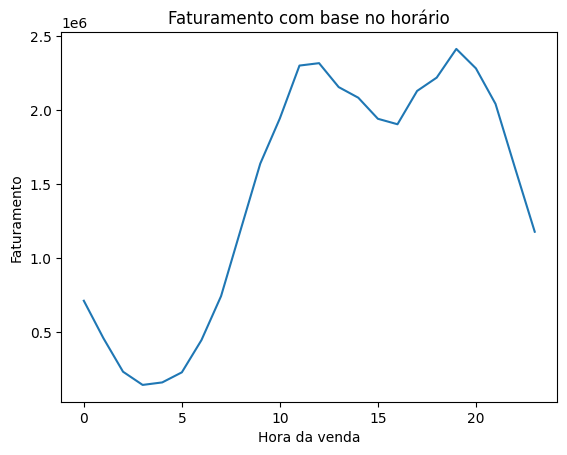

In [13]:
sns.lineplot(x="Horario_Venda", y="Faturamento",
             data=df_hora)
plt.title("Faturamento com base no horário")
plt.xlabel("Hora da venda")
plt.ylabel("Faturamento")

### Panoramas por Estado e cidade

In [15]:
df_estado = data.groupby(['Estado', 'Cidade'])[['Faturamento', 'Quantidade_Comprada']].sum().reset_index().sort_values(by = 'Faturamento', ascending= False)
df_estado


,Estado,Cidade,Faturamento,Quantidade_Comprada
1,CA,San Francisco,8262203.91,50239
0,CA,Los Angeles,5452570.80,33289
5,NY,New York City,4664317.43,27932
3,MA,Boston,3661642.01,22528
2,GA,Atlanta,2795498.58,16602
8,TX,Dallas,2767975.40,16730
9,WA,Seattle,2747755.48,16553
6,OR,Portland,1870732.34,11303
7,TX,Austin,1819581.75,11153
4,ME,Portland,449758.27,2750


In [16]:
# produtos com maiores saídas por estado

df_estado_produtos = data.groupby(['Estado', 'Produto'])[['Faturamento', 'Quantidade_Comprada']].sum().reset_index().sort_values(by = 'Faturamento', ascending= False)
df_estado_produtos.head()

,Estado,Produto,Faturamento,Quantidade_Comprada
11,CA,Notebook Macbook Pro,3207900.00,1887
18,CA,iPhone,1945300.00,2779
12,CA,Notebook ThinkPad,1603983.96,1604
5,CA,Google Phone,1323600.00,2206
87,NY,Notebook Macbook Pro,1116900.00,657


#### Faturamento Temporal

In [17]:
# Margens e volume de entrada e saída de dinheiro

df_faturamento = data[data['Data_Venda'] != '2020-01-01	'].groupby('Data_Venda')[['Custo',	'Faturamento',	'Lucro_Bruto']].sum()

In [18]:
df_faturamento

,Custo,Faturamento,Lucro_Bruto
Data_Venda,,,
2019-01-01,23772.6098,65681.94,41909.3302
2019-01-02,26797.1171,70813.20,44016.0829
2019-01-03,18229.2163,47046.20,28816.9837
2019-01-04,23159.1179,62012.21,38853.0921
2019-01-05,18117.6311,46524.63,28406.9989
...,...,...,...
2019-12-27,48859.3890,126628.05,77768.6610
2019-12-28,52265.4692,134015.50,81750.0308
2019-12-29,59539.0440,156024.62,96485.5760


Text(0, 0.5, 'Lucro_Bruto (U$)')

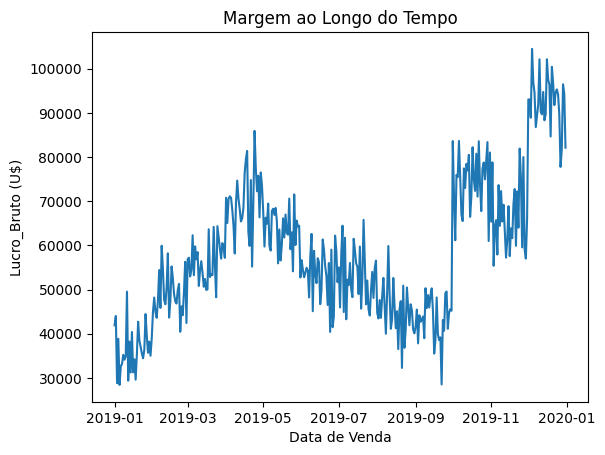

In [19]:
''' Margem de Lucro por dia '''

sns.lineplot(x="Data_Venda", y="Lucro_Bruto",
             data=df_faturamento)
plt.title("Margem ao Longo do Tempo")
plt.xlabel("Data de Venda")
plt.ylabel("Lucro_Bruto (U$)")


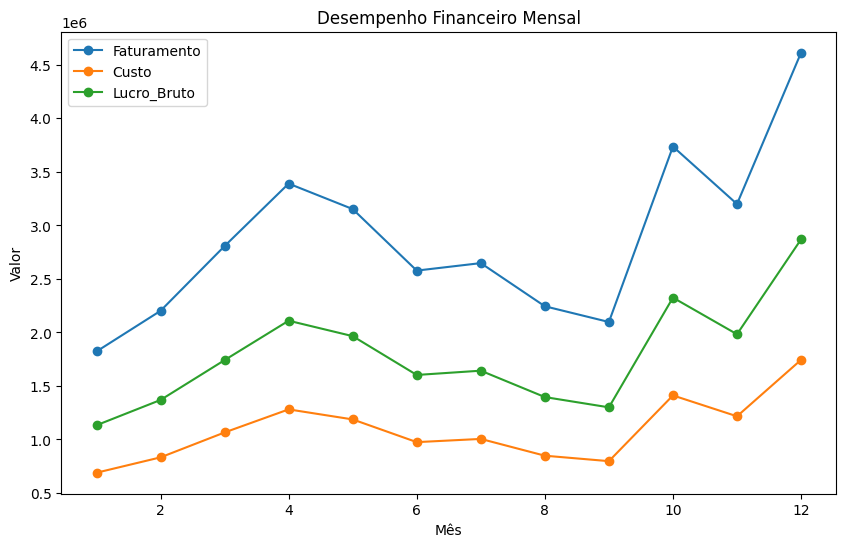

In [20]:
# faturamento por mês
faturamento_mes = data.groupby('Mes')[['Custo',	'Faturamento',	'Lucro_Bruto']].sum().reset_index()
faturamento_mes

pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Criar o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(faturamento_mes['Mes'], faturamento_mes['Faturamento'], label='Faturamento', marker='o')
plt.plot(faturamento_mes['Mes'], faturamento_mes['Custo'], label='Custo', marker='o')
plt.plot(faturamento_mes['Mes'], faturamento_mes['Lucro_Bruto'], label='Lucro_Bruto', marker='o')

# Adicionar rótulos e título
plt.xlabel('Mês')
plt.ylabel('Valor')
plt.title('Desempenho Financeiro Mensal')
plt.legend()

# Exibir o gráfico
plt.show()

# Restaurar a configuração padrão após a exibição do gráfico
pd.set_option('display.float_format', None)


<Figure size 1200x800 with 0 Axes>

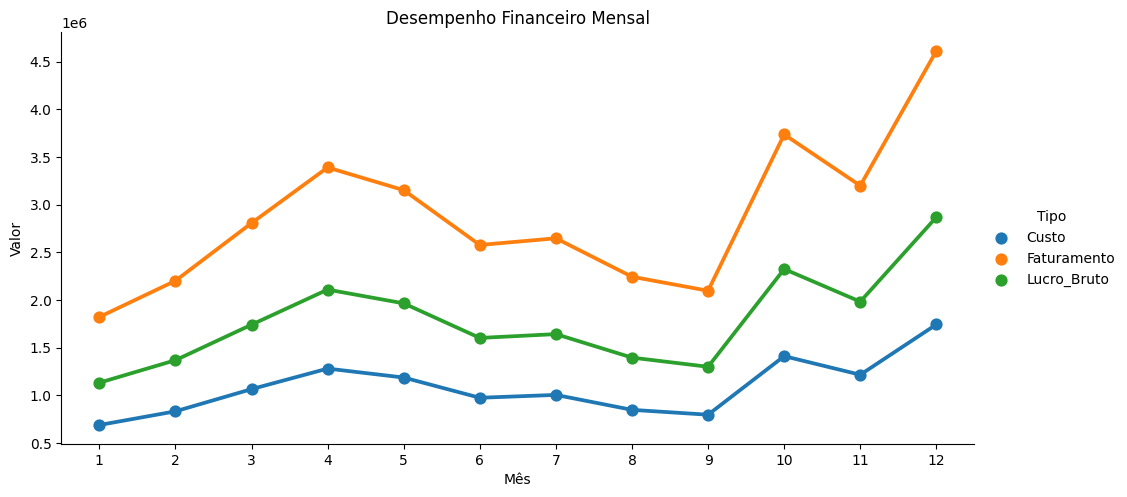

In [21]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Transformar o DataFrame em um formato longo (melt)
faturamento_mes_melted = faturamento_mes.melt(id_vars=['Mes'], var_name='Tipo', value_name='Valor')

# Criar o catplot
plt.figure(figsize=(12, 8))
sns.catplot(x='Mes', y='Valor', hue='Tipo', data=faturamento_mes_melted, kind='point', markers='o', aspect=2)

# Adicionar rótulos e título
plt.xlabel('Mês')
plt.ylabel('Valor')
plt.title('Desempenho Financeiro Mensal')

# Exibir o gráfico
plt.show()

# Restaurar a configuração padrão após a exibição do gráfico
pd.set_option('display.float_format', None)

In [22]:
df_faturamento_por_produto = data.groupby(['Cidade', 'Mes', 'Categoria'])[['Faturamento',	'Lucro_Bruto']].sum().reset_index().sort_values(by='Faturamento', ascending= False)
df_faturamento_por_produto

,Cidade,Mes,Categoria,Faturamento,Lucro_Bruto
381,San Francisco,12,Eletrônica,287044.20,179120.3229
383,San Francisco,12,Roupas,279397.14,174169.5921
382,San Francisco,12,Esportes,276601.19,172586.0206
380,San Francisco,12,Alimentação,263558.74,163119.3273
372,San Francisco,10,Alimentação,234660.58,147663.3940
...,...,...,...,...,...
80,Austin,9,Alimentação,24769.63,15004.6160
49,Austin,1,Eletrônica,22609.08,14029.7401
51,Austin,1,Roupas,19549.89,11920.1428
53,Austin,2,Eletrônica,18287.17,10986.9804


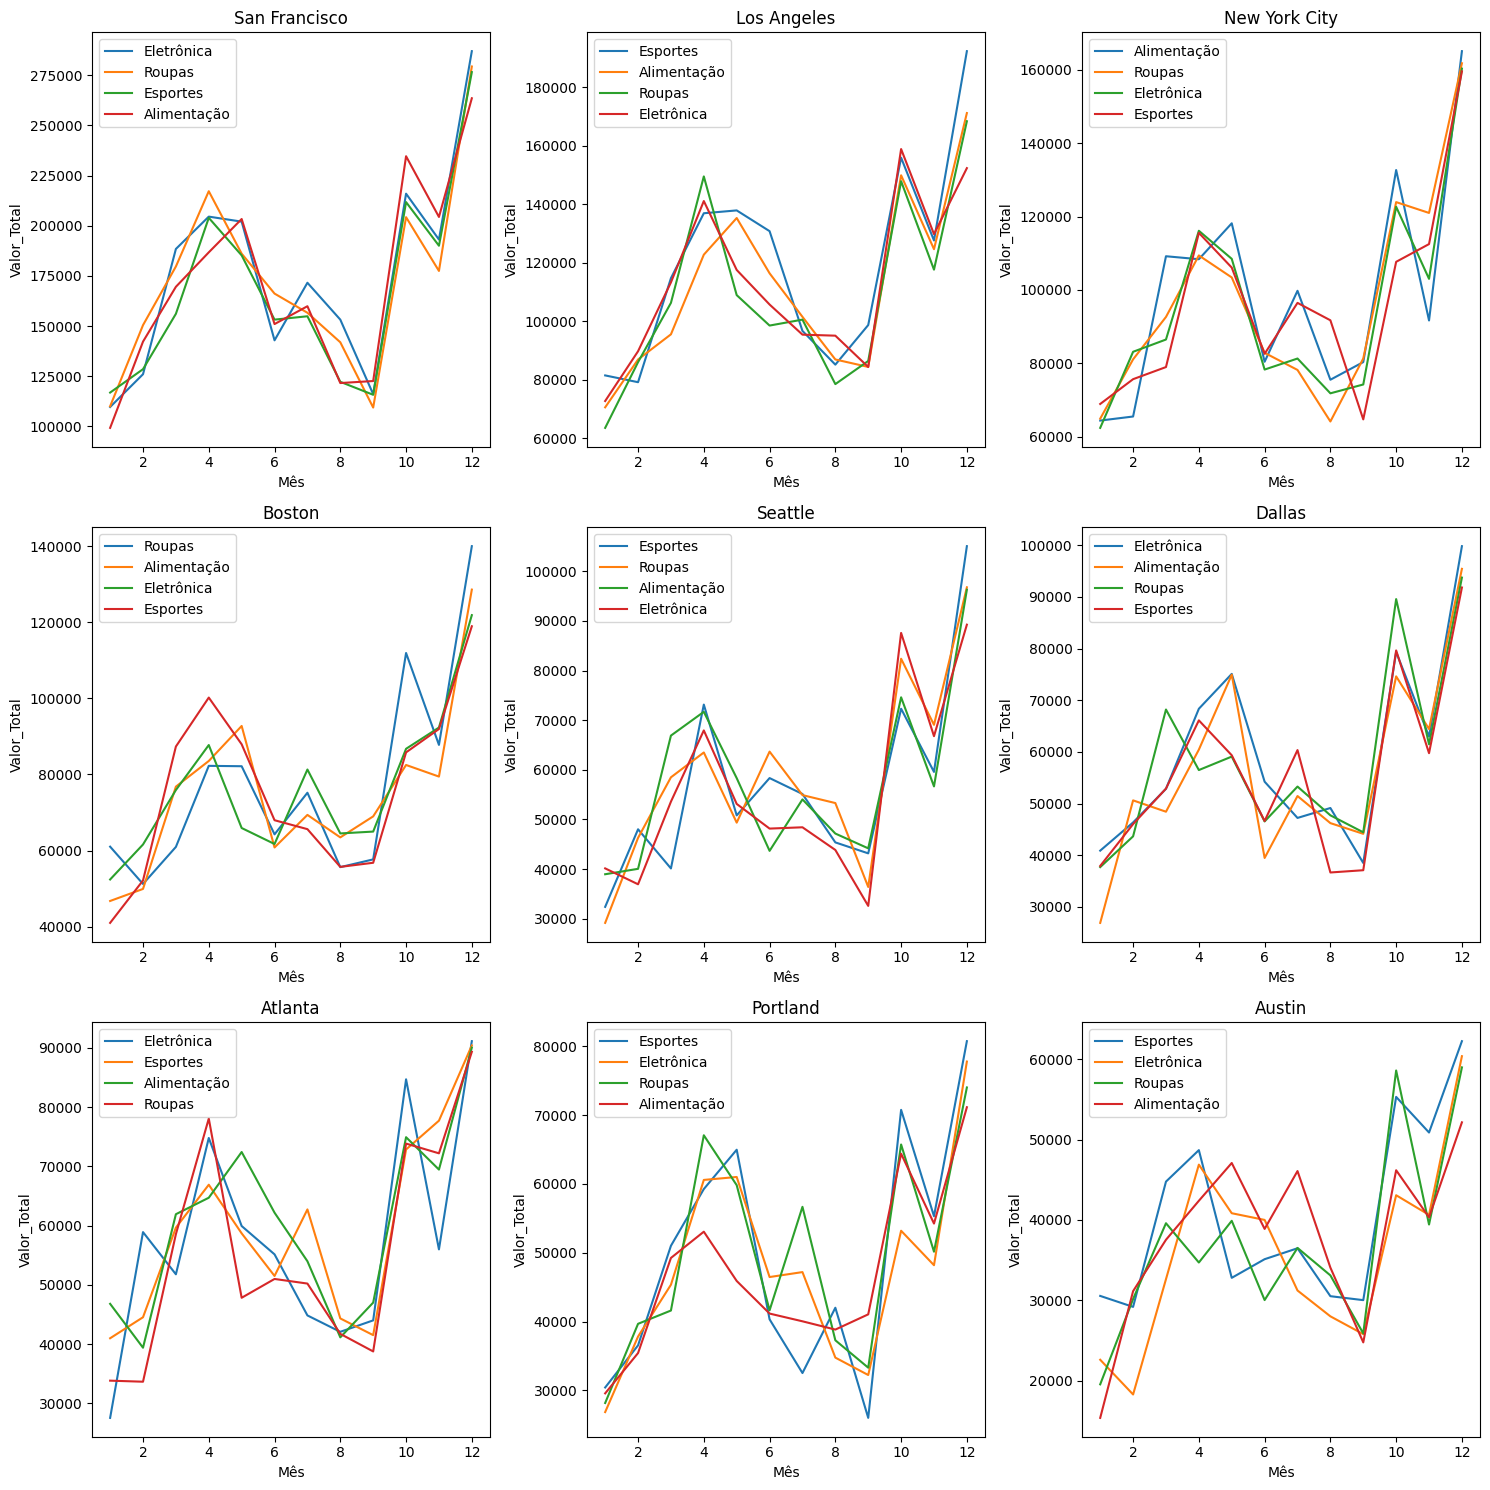

In [23]:
cidades = df_faturamento_por_produto['Cidade'].unique()

# Crie uma figura com uma grade de 3x3 de gráficos de linha
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Loop para criar gráficos separados para cada cidade (máximo de 3x3)
for i in range(3):
    for j in range(3):
        ax = axes[i, j]
        if i * 3 + j < len(cidades):
            cidade = cidades[i * 3 + j]
            cidade_df = df_faturamento_por_produto[df_faturamento_por_produto['Cidade'] == cidade]
            
            # Crie um gráfico de linha para a cidade atual
            sns.lineplot(x="Mes", y="Faturamento", hue="Categoria", data=cidade_df, ax=ax)
            ax.set_title(cidade)
            ax.set_xlabel('Mês')
            ax.set_ylabel('Valor_Total')
            ax.legend(loc='upper left')

# Remova quaisquer subplots não utilizados
for i in range(len(cidades), 9):
    fig.delaxes(axes[i // 3, i % 3])

plt.tight_layout()
plt.show()

In [24]:
'''Volume de Vendas por Tipo de Produto'''
volume_produto = 

SyntaxError: invalid syntax (2141424334.py, line 2)

#### Verificando Margem de Lucro por Produtos

In [ ]:
'''Avaliação da Margem de lucro por produtos'''

df_avaliacao_produto = data[data['Quantidade_Comprada'] == 1].groupby('Produto')[['Preco_Unitario',	'Custo']].agg('min').reset_index()
df_avaliacao_produto['Margem_Lucro'] = (1 - (df_avaliacao_produto['Custo'] / df_avaliacao_produto['Preco_Unitario'])) * 100
df_avaliacao_produto.sort_values(by = 'Margem_Lucro', ascending= False, inplace= True)

df_avaliacao_produto['Margem_PCT'] = round(df_avaliacao_produto['Margem_Lucro'], 2).astype(str) + ' %'
df_avaliacao_produto

,Produto,Preco_Unitario,Custo,Margem_Lucro,Margem_PCT
9,"Monitor gamer 27"" 4K",389.99,128.6967,67.0,67.0 %
8,"Monitor Ultrawide 34""",379.99,125.3967,67.0,67.0 %
17,TV Tela Plana,300.00,99.0000,67.0,67.0 %
16,Smartphone Vareebadd,400.00,132.0000,67.0,67.0 %
15,Secador LG,600.00,198.0000,67.0,67.0 %
12,Notebook ThinkPad,999.99,329.9967,67.0,67.0 %
11,Notebook Macbook Pro,1700.00,561.0000,67.0,67.0 %
10,Máquina de Lavar Roupas LG,600.00,198.0000,67.0,67.0 %
18,iPhone,700.00,231.0000,67.0,67.0 %
5,Google Phone,600.00,198.0000,67.0,67.0 %


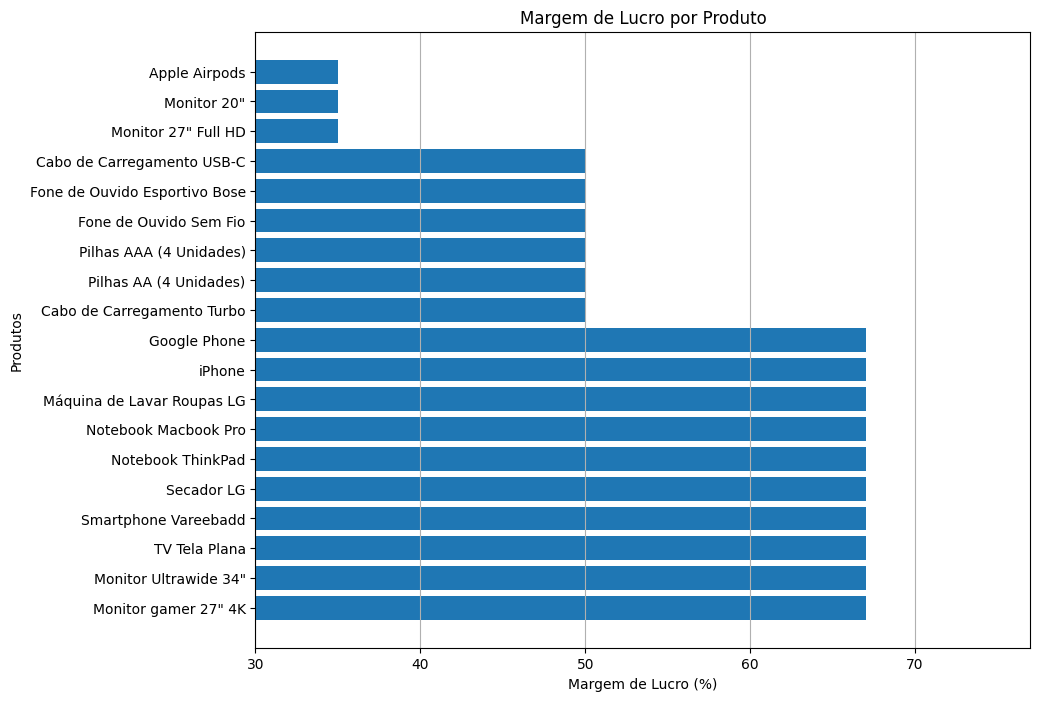

In [ ]:
plt.figure(figsize=(10, 8))
plt.barh(df_avaliacao_produto['Produto'], df_avaliacao_produto['Margem_Lucro'])
plt.xlabel('Margem de Lucro (%)')
plt.ylabel('Produtos')
plt.title('Margem de Lucro por Produto')
plt.xlim(30, max(df_avaliacao_produto['Margem_Lucro']) + 10)  # O segundo argumento pode ser ajustado conforme necessário
plt.grid(axis='x')

# Exibir o gráfico
plt.show()

In [25]:
'''
Verificar 
'''
data.sample(5)

,Produto,Categoria,Quantidade_Comprada,Preco_Unitario,Custo,Faturamento,Lucro_Bruto,Estado,Cidade,Horario_Venda,Data_Venda,Dia_Semana,Mes
131631,Fone de Ouvido Sem Fio,Roupas,1,11.99,5.995,11.99,5.995,CA,Los Angeles,22,2019-10-13,Domingo,10
2687,Cabo de Carregamento Turbo,Roupas,1,14.95,7.475,14.95,7.475,NY,New York City,19,2019-01-18,Sexta-Feira,1
118990,Cabo de Carregamento USB-C,Esportes,1,11.95,5.975,11.95,5.975,TX,Austin,13,2019-09-22,Domingo,9
57863,iPhone,Alimentação,1,700.00,231.000,700.00,469.000,ME,Portland,13,2019-05-24,Sexta-Feira,5
182398,iPhone,Alimentação,1,700.00,231.000,700.00,469.000,NY,New York City,8,2019-12-06,Sexta-Feira,12


In [35]:
# Criação de tabela de custos por produto 
data['Custo_Unitario'] = np.where(data['Quantidade_Comprada'] == 1,
                                  data['Custo'],
                                  data['Custo'] / data['Quantidade_Comprada'])

In [39]:
data.sample(5)

,Produto,Categoria,Quantidade_Comprada,Preco_Unitario,Custo,Faturamento,Lucro_Bruto,Estado,Cidade,Horario_Venda,Data_Venda,Dia_Semana,Mes,Custo_Unitario
30266,"Monitor 27"" Full HD",Alimentação,1,149.99,97.4935,149.99,52.4965,CA,Los Angeles,11,2019-03-08,Sexta-Feira,3,97.4935
101281,Fone de Ouvido Esportivo Bose,Alimentação,1,99.99,49.9950,99.99,49.9950,CA,San Francisco,21,2019-08-01,Quinta-Feria,8,49.9950
98524,Cabo de Carregamento USB-C,Alimentação,1,11.95,5.9750,11.95,5.9750,CA,San Francisco,21,2019-07-27,Sábado,7,5.9750
159639,Smartphone Vareebadd,Esportes,1,400.00,132.0000,400.00,268.0000,OR,Portland,19,2019-11-24,Domingo,11,132.0000
152991,Pilhas AA (4 Unidades),Eletrônica,2,3.84,3.8400,7.68,3.8400,GA,Atlanta,9,2019-11-16,Sábado,11,1.9200


In [41]:
# Faturamentopor produto 
faturamento_produto_comparativo = data.groupby(['Produto', 'Custo_Unitario'])['Quantidade_Comprada'].sum().reset_index().sort_values(by = 'Produto', ascending= True)
faturamento_produto_comparativo

,Produto,Custo_Unitario,Quantidade_Comprada
0,Apple Airpods,97.5000,15661
1,Cabo de Carregamento Turbo,7.4750,22926
2,Cabo de Carregamento Turbo,7.4750,291
3,Cabo de Carregamento USB-C,5.9750,477
4,Cabo de Carregamento USB-C,5.9750,23498
5,Fone de Ouvido Esportivo Bose,49.9950,13451
6,Fone de Ouvido Esportivo Bose,49.9950,6
7,Fone de Ouvido Sem Fio,5.9950,20557
8,Google Phone,198.0000,5532
9,"Monitor 20""",71.4935,4129


#### Tendencia por produto

In [32]:
faturamento_mes_produto = data.groupby(['Mes', 'Produto'])[['Faturamento',	'Custo', 'Lucro_Bruto']].sum().reset_index().sort_values(by='Faturamento', ascending= False)
faturamento_mes_produto

,Mes,Produto,Faturamento,Custo,Lucro_Bruto
220,12,Notebook Macbook Pro,1093100.00,360723.000,732377.000
182,10,Notebook Macbook Pro,892500.00,294525.000,597975.000
87,5,Notebook Macbook Pro,790500.00,260865.000,529635.000
68,4,Notebook Macbook Pro,771800.00,254694.000,517106.000
201,11,Notebook Macbook Pro,748000.00,246840.000,501160.000
...,...,...,...,...,...
147,8,Pilhas AAA (4 Unidades),6042.79,3021.395,3021.395
33,2,Pilhas AAA (4 Unidades),5896.28,2948.140,2948.140
166,9,Pilhas AAA (4 Unidades),5749.77,2874.885,2874.885
13,1,Pilhas AA (4 Unidades),5468.16,2734.080,2734.080


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

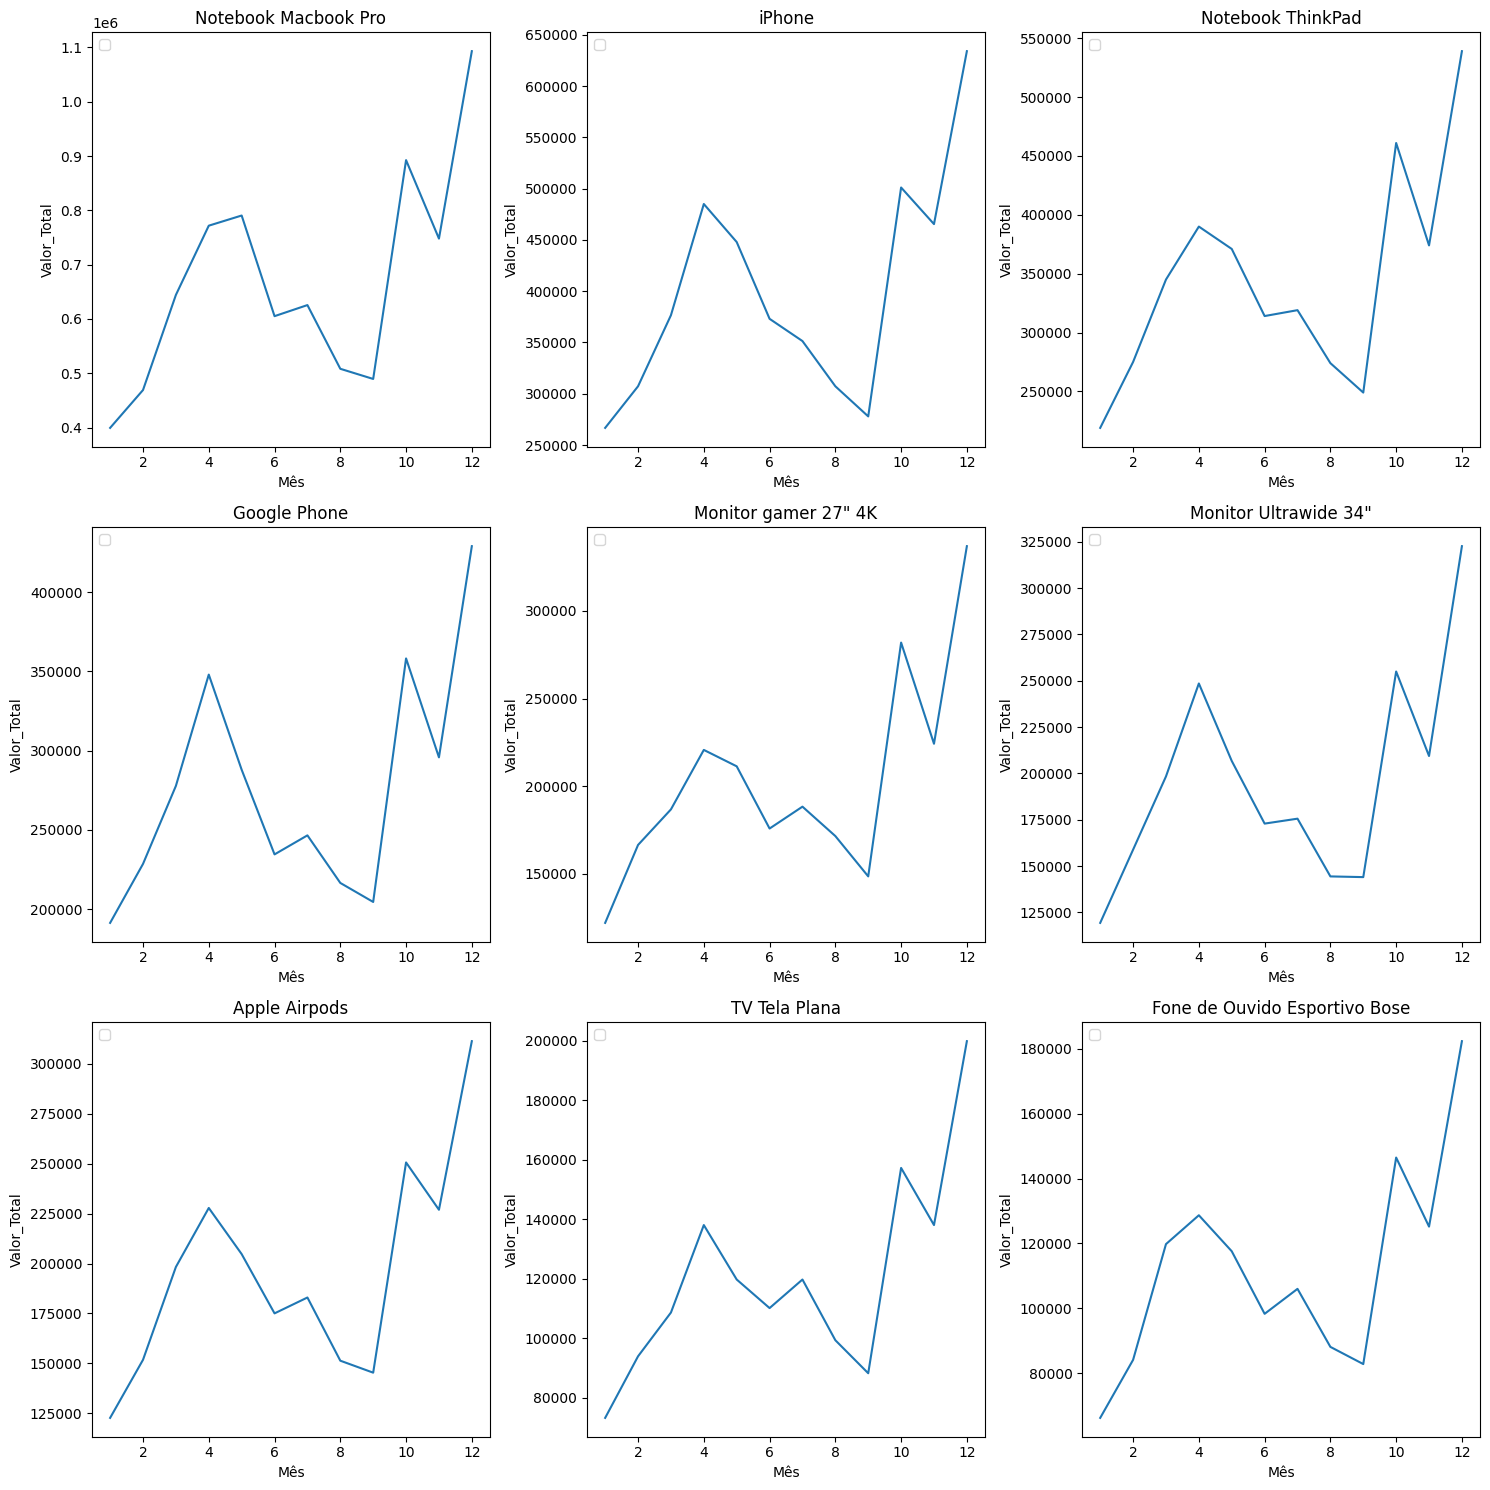

In [33]:
produtos = faturamento_mes_produto['Produto'].unique()

# Crie uma figura com uma grade de 3x3 de gráficos de linha
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Loop para criar gráficos separados para cada produto (máximo de 3x3)
for i in range(3):
    for j in range(3):
        ax = axes[i, j]
        if i * 3 + j < len(produtos):
            produto_atual = produtos[i * 3 + j]
            produto_df = faturamento_mes_produto[faturamento_mes_produto['Produto'] == produto_atual]
            
            # Crie um gráfico de linha para o produto atual
            sns.lineplot(x="Mes", y="Faturamento", data=produto_df, ax=ax)
            ax.set_title(produto_atual)
            ax.set_xlabel('Mês')
            ax.set_ylabel('Valor_Total')
            ax.legend(loc='upper left')

# Remova quaisquer subplots não utilizados
for i in range(len(produtos), 9):
    fig.delaxes(axes[i // 3, i % 3])

plt.tight_layout()
plt.show()

## Separação de DF para Etapa de Pré Processamento dos dados

- Volume de Vendas 

In [42]:
data.sample(10)

,Produto,Categoria,Quantidade_Comprada,Preco_Unitario,Custo,Faturamento,Lucro_Bruto,Estado,Cidade,Horario_Venda,Data_Venda,Dia_Semana,Mes,Custo_Unitario
53115,Cabo de Carregamento USB-C,Alimentação,1,11.95,5.975,11.95,5.975,MA,Boston,5,2019-04-27,Sábado,4,5.975
73336,Fone de Ouvido Sem Fio,Eletrônica,1,11.99,5.995,11.99,5.995,TX,Austin,19,2019-06-16,Domingo,6,5.995
165564,Cabo de Carregamento Turbo,Esportes,1,14.95,7.475,14.95,7.475,NY,New York City,21,2019-12-30,Segunda-Feira,12,7.475
10674,Apple Airpods,Alimentação,1,150.00,97.500,150.00,52.500,CA,Los Angeles,21,2019-02-02,Sábado,2,97.500
20909,Pilhas AAA (4 Unidades),Eletrônica,1,2.99,1.495,2.99,1.495,CA,San Francisco,12,2019-02-18,Segunda-Feira,2,1.495
53678,Fone de Ouvido Sem Fio,Eletrônica,1,11.99,5.995,11.99,5.995,CA,San Francisco,22,2019-04-10,Quarta-Feira,4,5.995
109741,Apple Airpods,Alimentação,1,150.00,97.500,150.00,52.500,CA,San Francisco,4,2019-08-19,Segunda-Feira,8,97.500
116373,Fone de Ouvido Sem Fio,Alimentação,1,11.99,5.995,11.99,5.995,CA,San Francisco,23,2019-09-27,Sexta-Feira,9,5.995
135504,Fone de Ouvido Esportivo Bose,Alimentação,1,99.99,49.995,99.99,49.995,CA,San Francisco,19,2019-10-26,Sábado,10,49.995
34551,Pilhas AAA (4 Unidades),Eletrônica,1,2.99,1.495,2.99,1.495,NY,New York City,14,2019-03-28,Quinta-Feria,3,1.495


In [43]:
data_ml = data

In [48]:
data_ml = data_ml.drop(columns = ['Categoria', 'Preco_Unitario', 'Horario_Venda', 'Dia_Semana'])

In [49]:
data_ml.sample(5)

,Produto,Quantidade_Comprada,Custo,Faturamento,Lucro_Bruto,Estado,Cidade,Data_Venda,Mes,Custo_Unitario
4685,TV Tela Plana,1,99.0000,300.00,201.0000,CA,Los Angeles,2019-01-24,1,99.0000
120310,"Monitor Ultrawide 34""",1,125.3967,379.99,254.5933,CA,San Francisco,2019-09-22,9,125.3967
122776,Cabo de Carregamento Turbo,1,7.4750,14.95,7.4750,CA,San Francisco,2019-09-18,9,7.4750
98524,Cabo de Carregamento USB-C,1,5.9750,11.95,5.9750,CA,San Francisco,2019-07-27,7,5.9750
80606,Cabo de Carregamento Turbo,1,7.4750,14.95,7.4750,TX,Dallas,2019-06-24,6,7.4750
